# READ ME

1. The notebook should be on L4 GPU.
2. Upload input images from img-test (from github) for which captions are to be generated.
3. Run all the cells.
4. The model used is blip-image-captioning-large.
5. Caption will be generated for the input images.


**NOTE:**

This is the code to generate captions from blip-image-captioning-large model that is developed by Salesforce. This code file gets the pre trained model and processor to generate captions for uploaded input images.


**Additional:**

If you want to test the model on a particular image then at the end of examples the last cell has the code to execute in comments. Remove the comments and execute it.

# Packages

In [1]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Loading the pre trained model

In [2]:
# Load BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-23): 24 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (projection): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          )
          (layer_norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((1024,),

# Testing the model on the example images

In [4]:
def generate_caption(image_path, model, processor, device):
    """
    Generates a caption for a given image using the BLIP model and displays the image.

    Args:
        image_path (str): Path to the image file.

    Returns:
        str: The generated caption for the image.
    """
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor.image_processor(images=image, return_tensors="pt")["pixel_values"].to(device)

    # Generate prediction
    model.eval()
    with torch.no_grad():
        outputs = model.generate(
            pixel_values=pixel_values,
            max_length=64,
            num_beams=5,
            early_stopping=True
        )

    # Decode the generated caption
    caption = processor.tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Display the image and caption
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    return caption

# Examples

## Image 1

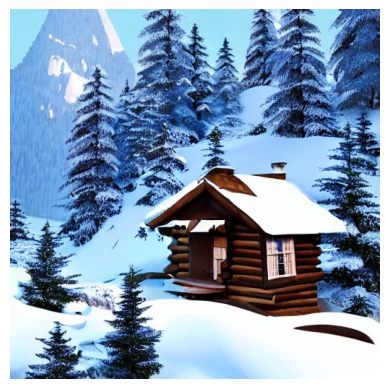

Caption: there is a small cabin in the middle of a snowy mountain


In [5]:
image_path = "image-1.png"
caption = generate_caption(image_path, model, processor, device)
print(f"Caption: {caption}")

**Generated image based on caption for Image 1:**

**Prompt:**

Generate a realistic image based on the description - there is a small cabin in the middle of a snowy mountain

**Generated Image:**

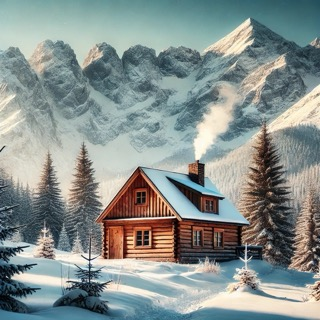

## Image 2

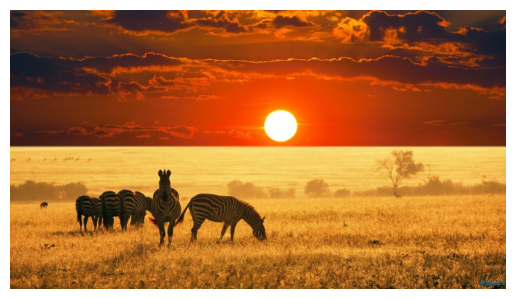

Caption: there are many zebras that are grazing in the field at sunset


In [6]:
image_path = "image-2.png"
caption = generate_caption(image_path, model, processor, device)
print(f"Caption: {caption}")

**Generated image based on caption for Image 2:**

**Prompt:**

Generate a realistic image based on the description - there are many zebras that are grazing in the field at sunset

**Generated Image:**

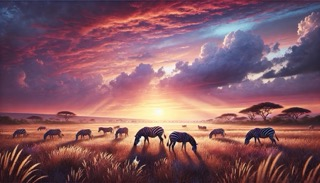

## Image 3

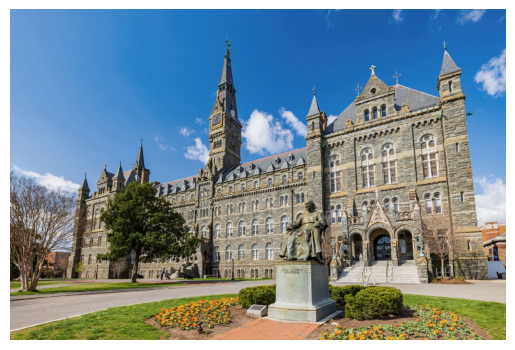

Caption: there is a statue of a man in front of a large building


In [7]:
image_path = "image-3.png"
caption = generate_caption(image_path, model, processor, device)
print(f"Caption: {caption}")

**Generated image based on caption for Image 3:**

**Prompt:**

Generate a realistic image based on the description - there is a statue of a man in front of a large building

**Generated Image:**

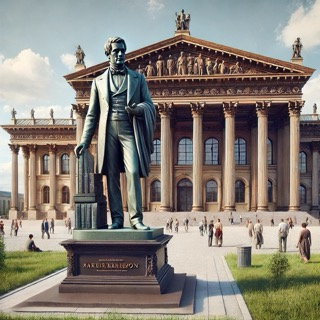

# Test on a particular image

In [8]:
#image_path = "image-3.png"
#caption = generate_caption(image_path, model, processor, device)
#print(f"Caption: {caption}")